In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Eleckart=pd.read_csv("C:/Users/shivali_dalmia/Desktop/UpGrad/GroupCaseStudy/ConsumerElectronics.csv")
Eleckart.shape

(1648824, 20)

In [3]:
Eleckart.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
Eleckart['product_analytic_sub_category'].value_counts()

Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

### Preparing and merging Product List data

In [5]:
data_product_list=pd.read_excel("C:/Users/shivali_dalmia/Desktop/UpGrad/GroupCaseStudy/MediaData.xlsx", sheetname='Product List', skiprows=[0], usecols=range(1,4))
data_product_list.columns=['product_analytic_vertical','frequency_y','percent']

data_product_list.head()

,product_analytic_vertical,frequency_y,percent
0,\N,5828,0.353464
1,AmplifierReceiver,4056,0.245994
2,AudioMP3Player,112892,6.846819
3,Binoculars,14599,0.885419
4,BoomBox,2879,0.174609


In [6]:
Eleckart = pd.merge(Eleckart,data_product_list,on='product_analytic_vertical')
Eleckart.shape

(1648824, 22)

In [7]:
Eleckart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648824 entries, 0 to 1648823
Data columns (total 22 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

### Preparing and merging Media Investment Data

In [8]:
data_media=pd.read_excel("C:/Users/shivali_dalmia/Desktop/UpGrad/GroupCaseStudy/MediaData.xlsx", sheetname='Media Investment', skiprows=[0,1], usecols=range(1,13))
data_media.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


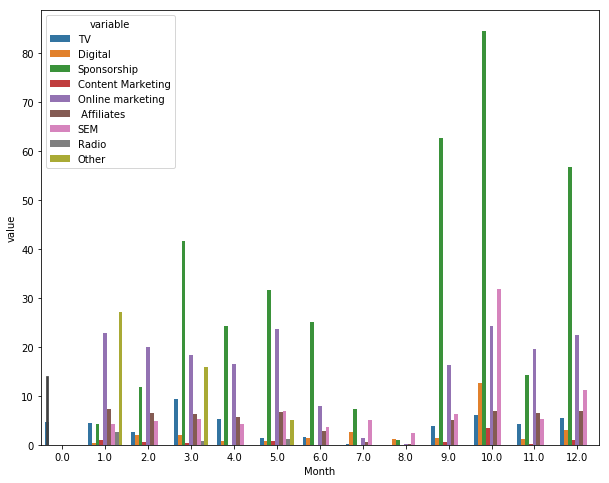

In [9]:
data_media["Year_month"]=data_media["Year"].map(str) + "-" +data_media["Month"].map(str)
data_media[["Year", "Month"]] = data_media[["Year", "Month"]].apply(pd.to_numeric)

#Replacing NA values by zero in Radio and Others investment details
data_media.fillna(0, inplace=True)
data_media
# Visualising
melt=pd.melt(data_media, id_vars=['Year','Month'],value_vars= data_media.columns[3:12])
plt.figure(figsize=(10,8))
sns.barplot(y='value',x='Month', hue='variable',data=melt)

In [10]:
#Merging MEdia Investment with main data frame of Eleckart
Eleckart = pd.merge(Eleckart,data_media,how='inner',on='Month')
Eleckart.shape

(1648824, 34)

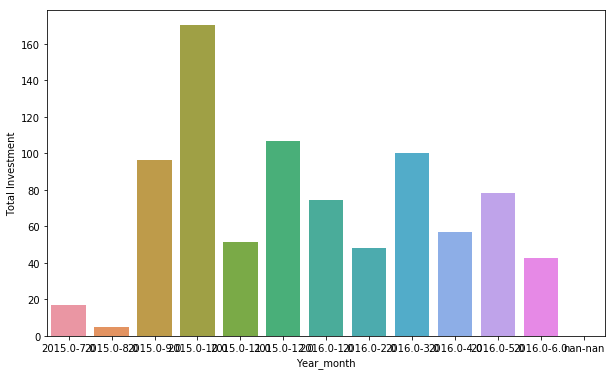

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(y='Total Investment', x='Year_month',data=data_media)

### Preparing 'NPS' data

In [12]:
data_nps=pd.read_excel("C:/Users/shivali_dalmia/Desktop/UpGrad/GroupCaseStudy/MediaData.xlsx", sheetname='Monthly NPS Score', skiprows=[0,1],index_col=None, header=None)

In [13]:
month_nps_score = data_nps
month_np_score_tr = month_nps_score.transpose()
month_np_score_tr['NPS'] = month_np_score_tr[0]
month_np_score_tr = month_np_score_tr.drop([0],axis=1)
month_np_score_tr['Stock Index'] = month_np_score_tr[1]
month_np_score_tr = month_np_score_tr.drop([1],axis=1)
month_np_score_tr = month_np_score_tr. drop([0], axis=0)
month_np_score_tr['Month'] = [7,8,9,10,11,12,1,2,3,4,5,6]
month_np_score_tr.head(10)

,NPS,Stock Index,Month
1,54.5996,1177,7
2,59.9871,1206,8
3,46.9254,1101,9
4,44.3984,1210,10
5,47,1233,11
6,45.8,1038,12
7,47.093,1052,1
8,50.3274,1222,2
9,49.0206,1015,3
10,51.8276,1242,4


In [14]:
# Merging with the Eleckart
data_nps_ekart = pd.merge(Eleckart,month_np_score_tr,how='inner',on='Month')
Eleckart = data_nps_ekart

In [15]:
Eleckart.shape

(1648824, 36)

#### Filtering and adding features

In [16]:
#Criteria 1: Use the data from July 2015 to June 2016
Eleckart['order_date']= pd.to_datetime(Eleckart['order_date'], errors='coerce')
mask = (Eleckart['order_date'] >= '2015-07-01') & (Eleckart['order_date'] <= '2016-06-30')
Eleckart= Eleckart.loc[mask]
Eleckart.head(5)

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Year_month,NPS,Stock Index
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.3984,1210
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.3984,1210
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.3984,1210
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.3984,1210
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.3984,1210


In [17]:
Eleckart.shape

(1644943, 36)

In [18]:
Eleckart.isnull().sum()

fsn_id                             0
order_date                         0
Year_x                             0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
frequency_y                        0
percent                            0
Year_y                             0
Total Investment                   0
TV                                 0
Digital                            0
Sponsorship                        0
C

In [19]:
#Writing the extracted data July 2015 to June 2016 to a new file called ConsumerElectronicsExtracted.csv'
Eleckart.to_csv('ConsumerElectronicsExtracted.csv')

In [20]:
#Let us address the \N values in the data set ConsumerElectronicsExtracted.csv by replacing it with NA values.
Eleckart1= pd.read_csv('ConsumerElectronicsExtracted.csv', na_values=['\\N',''])
Eleckart1.drop(["Unnamed: 0"], axis = 1, inplace = True)
Eleckart1.head(5)

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Year_month,NPS,Stock Index
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,NaN,NaN,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.398389,1210.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,NaN,NaN,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.398389,1210.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,NaN,NaN,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.398389,1210.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,NaN,NaN,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.398389,1210.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,NaN,NaN,...,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015.0-10.0,44.398389,1210.0


In [21]:
Eleckart1.isnull().sum()

fsn_id                                   0
order_date                               0
Year_x                                   0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                      0
units                                    0
deliverybdays                      1312149
deliverycdays                      1312148
s1_fact.order_payment_type               0
sla                                      0
cust_id                                  0
pincode                                  0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5821
product_mrp                              0
product_procurement_sla                  0
frequency_y                              0
percent                                  0
Year_y                                   0
Total Inves

In [22]:
# Removing rows without product_analytic_data
Eleckart1=Eleckart1[~Eleckart1['product_analytic_vertical'].isnull()]
# Filling the delivery days null values wit '0'
Eleckart1.fillna(0, inplace=True)

In [23]:
#Extracting the day and week from the given data set
Eleckart1['order_date']= pd.to_datetime(Eleckart1['order_date'], errors='coerce')
Eleckart1['Day'] = Eleckart1['order_date'].dt.day

In [24]:
# Introducing Week level data
import math
from datetime import date
origin = date(2015, 7, 1)

def week_number_from(my_date, origin):
    return math.floor((my_date - origin).days / 7 + 1)
Eleckart1['Week'] = Eleckart1['order_date'].apply(lambda x : week_number_from(x.date(), origin))

In [25]:
Eleckart1['Week'].describe()

count    1.639122e+06
mean     2.803275e+01
std      1.380205e+01
min      1.000000e+00
25%      1.600000e+01
50%      2.800000e+01
75%      4.000000e+01
max      5.300000e+01
Name: Week, dtype: float64

In [26]:
print('The minimum order date {}. The maximum order date {}.'.format(
    Eleckart1.order_date.min(), Eleckart1.order_date.max()))

The minimum order date 2015-07-01 00:36:11. The maximum order date 2016-06-29 23:59:22.


### Preparing and merging Sales data

In [27]:
data_special_sale=pd.read_excel("C:/Users/shivali_dalmia/Desktop/UpGrad/GroupCaseStudy/MediaData.xlsx", sheetname='Special Sale Calendar', skiprows=[0,1,14,15],index_col=0, header=None)

data_special_sale.reset_index(drop=True,inplace=True)
data_special_sale.columns=['Year','special_sales']
data_special_sale.iloc[0:6,0:1]=2015
data_special_sale.iloc[6:,0:1]=2016

#Deriving Manually
data_special_sale['sales_start_week']=[3,7,9,16,19,26,30,32,34,33,37,48]
data_special_sale['sales_end_week']=[3,8,9,16,20,27,30,32,34,34,37,48]
data_special_sale

,Year,special_sales,sales_start_week,sales_end_week
0,2015.0,(18-19th July),3,3
1,2015.0,(15-17th Aug),7,8
2,2015.0,(28-30th Aug),9,9
3,2015.0,(17-15th Oct),16,16
4,2015.0,(7-14th Nov),19,20
5,2015.0,(25th Dec'15 - 3rd Jan'16),26,27
6,2016.0,(20-22 Jan),30,30
7,2016.0,(1-2 Feb),32,32
8,2016.0,(20-21 Feb),34,34
9,2016.0,(14-15 Feb),33,34


In [28]:
#Merging sales data frame with Eleckart data frame on weekly basis
data_special_sale['Week'] = data_special_sale['sales_start_week']
Eleckart1 = pd.merge(Eleckart1,data_special_sale,how='left',on='Week')
Eleckart1.shape

(1639122, 42)

In [29]:
#Check the count of missing values in the columns
Eleckart1.isnull().sum()

fsn_id                                   0
order_date                               0
Year_x                                   0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                      0
units                                    0
deliverybdays                            0
deliverycdays                            0
s1_fact.order_payment_type               0
sla                                      0
cust_id                                  0
pincode                                  0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical                0
product_mrp                              0
product_procurement_sla                  0
frequency_y                              0
percent                                  0
Year_y                                   0
Total Inves

In [30]:
#Calculating the percentage of null values
round(100*(Eleckart1.isnull().sum()/len(Eleckart1.index)), 2)

fsn_id                              0.00
order_date                          0.00
Year_x                              0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
gmv                                 0.00
units                               0.00
deliverybdays                       0.00
deliverycdays                       0.00
s1_fact.order_payment_type          0.00
sla                                 0.00
cust_id                             0.00
pincode                             0.00
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
product_analytic_vertical           0.00
product_mrp                         0.00
product_procurement_sla             0.00
frequency_y                         0.00
percent                             0.00
Year_y                              0.00
Total Investment                    0.00
TV              

From the above it is clear that % of null values are as follows 
##### Year                                        75.39
##### special_sales                         75.39
##### sales_start_week                   75.39
##### sales_end_week                     75.39 

We have a good healthy dataset, thus removal of these null values will not impact in the end result. 
Replacing the null values with 'zero'


In [31]:
Eleckart1.fillna(0, inplace=True)

In [32]:
Eleckart1.isnull().sum()

fsn_id                             0
order_date                         0
Year_x                             0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
frequency_y                        0
percent                            0
Year_y                             0
Total Investment                   0
TV                                 0
Digital                            0
Sponsorship                        0
C

In [33]:
#Let us check the number of duplicate values in the dataframe
Eleckart1.duplicated().sum()

104816

In [34]:
duplicateRowsDF = Eleckart1[Eleckart1.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
duplicateRowsDF

All Duplicate Rows based on all columns are :


,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Other,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week
5436,ACCE8FTBXFKBNZMY,2015-10-08 12:15:58,2015,10,3.403115e+15,3.403115e+15,240,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,8,15,0.0,0,0.0,0.0
5437,ACCE8FTHTHW6QNCC,2015-10-13 13:08:34,2015,10,2.404475e+15,2.404475e+15,299,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,13,15,0.0,0,0.0,0.0
5438,ACCE8FTHTHW6QNCC,2015-10-05 12:21:24,2015,10,1.403656e+15,1.403656e+15,399,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,5,14,0.0,0,0.0,0.0
5439,ACCE8FTHTHW6QNCC,2015-10-07 21:39:08,2015,10,1.403977e+15,1.403977e+15,299,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,7,15,0.0,0,0.0,0.0
5440,ACCE8FTBXFKBNZMY,2015-10-08 12:15:58,2015,10,3.403115e+15,3.403115e+15,240,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,8,15,0.0,0,0.0,0.0
5441,ACCE8FTHTHW6QNCC,2015-10-13 13:08:34,2015,10,2.404475e+15,2.404475e+15,299,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,13,15,0.0,0,0.0,0.0
5442,ACCE8FTHTHW6QNCC,2015-10-05 12:21:24,2015,10,1.403656e+15,1.403656e+15,399,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,5,14,0.0,0,0.0,0.0
5443,ACCE8FTHTHW6QNCC,2015-10-07 21:39:08,2015,10,1.403977e+15,1.403977e+15,299,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,7,15,0.0,0,0.0,0.0
9735,ACCCYNHKSWFXGRD8,2015-10-01 00:01:32,2015,10,4.404927e+15,4.404927e+15,12585,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,1,14,0.0,0,0.0,0.0
9736,ACCCYNHKSWFXGRD8,2015-10-01 00:01:32,2015,10,4.404927e+15,4.404927e+15,12585,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,1,14,0.0,0,0.0,0.0


In [35]:
#From the above list we can see that there are duplicate rows and we intend to keep only one of them.
#Dropping duplicates and keeping the first occurance
Eleckart1.drop_duplicates(keep = 'first', inplace = True)

In [36]:
#There are no duplicate values in the dataframe.
Eleckart1.duplicated().sum()

0

In [37]:
Eleckart1.head(5)

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Other,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,19,16,2015.0,(17-15th Oct),16.0,16.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,20,16,2015.0,(17-15th Oct),16.0,16.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,14,16,2015.0,(17-15th Oct),16.0,16.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0


In [38]:
Eleckart1.shape

(1534306, 42)

In [39]:
# Percentage of data left from original dataset for analysis
(len(Eleckart1.index)/1648824)*100

93.05456495053444

In [40]:
Eleckart1["order_date"] = Eleckart1["order_date"].astype(str)

#### Handling Zero GMV entries

In [41]:
Eleckart1['gmv'].count()

1534306

In [42]:
# Replacing Empty spaces with NaNs
Eleckart1['gmv'].replace(r'\s+', np.nan,regex=True,inplace=True)
# Removing rows where GMV Values are Null
Eleckart1=Eleckart1[~Eleckart1.gmv.isnull()]

In [43]:
print("Count of rows with gmv value equal to '0' = {}".format(Eleckart1[Eleckart1['gmv']==0].shape[0]))
#Removing these rows
Eleckart1=Eleckart1[Eleckart1['gmv']!=0]
print("After removing such rows :")
Eleckart1[Eleckart1['gmv']==0].shape[0]

Count of rows with gmv value equal to '0' = 924
After removing such rows :


0

In [44]:
Eleckart1['gmv'].dtype

dtype('O')

In [45]:
Eleckart1['gmv'] = pd.to_numeric(Eleckart1['gmv'], errors='coerce')

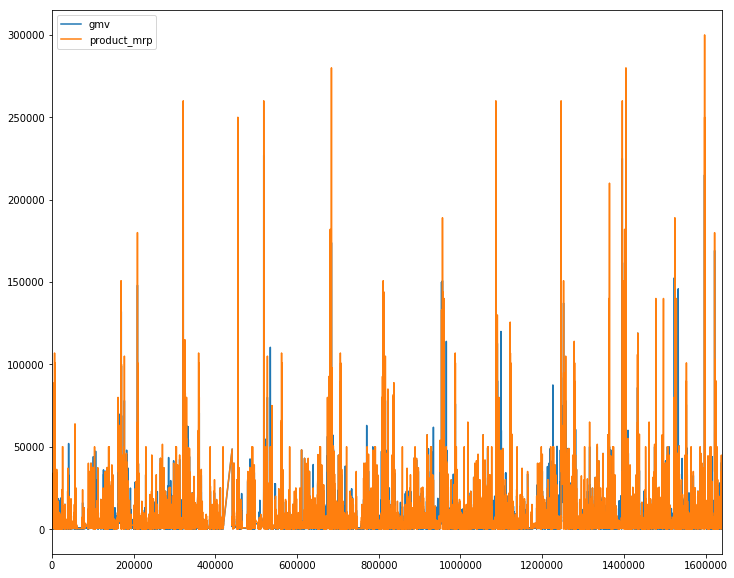

In [47]:
Eleckart1.plot(y=['gmv','product_mrp'],use_index=True,figsize=(12,10))

#### Some GMV Values are greater than their corresponding MRPs, we'll replace such MRPs with GMVs

In [48]:
Eleckart1['product_mrp']=np.where(Eleckart1['gmv']>Eleckart1['product_mrp'],Eleckart1['gmv'],Eleckart1['product_mrp'])

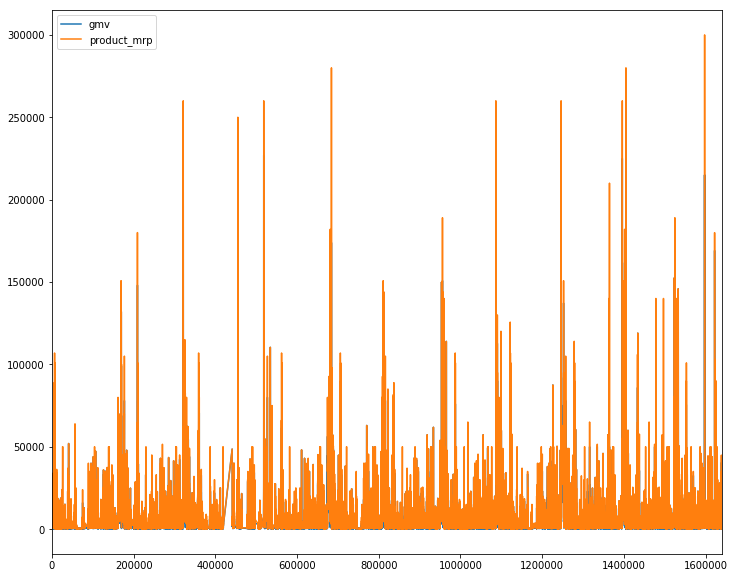

In [49]:
Eleckart1.plot(y=['gmv','product_mrp'],use_index=True,figsize=(12,10))

In [50]:
Eleckart1['s1_fact.order_payment_type'].count()

1529357

In [51]:
Eleckart1['s1_fact.order_payment_type'].unique().tolist()

['COD', 'Prepaid']

In [52]:
#Comparing the percentage
Eleckart1['s1_fact.order_payment_type'].value_counts()/Eleckart1['s1_fact.order_payment_type'].count()

COD        0.721822
Prepaid    0.278178
Name: s1_fact.order_payment_type, dtype: float64

##### From the above output it is clear that COD (Cash on Delivery is the preferred one).

In [53]:
# Checking the number of rows
Eleckart1['sla'].count()

1529357

#### Inspecting and preparing pincode column

In [54]:
# Checking the number of unique pincodes
Eleckart1['pincode'].nunique()

17298

In [55]:
# Replacing Empty spaces with NaNs
Eleckart1['pincode'].replace(r'\s+', np.nan,regex=True,inplace=True)
# Removing rows where pincode Values are Null
Eleckart1=Eleckart1[~Eleckart1.pincode.isnull()]

In [56]:
Eleckart1['pincode'].nunique()

17298

##### There are a total of 12919 unique pincodes

#### Inspecting Customer IDs

In [57]:
# Checking for unique customer IDs
Eleckart1['cust_id'].nunique()

1253030

In [58]:
# Replacing Empty spaces with NaNs
Eleckart1['cust_id'].replace(r'\s+', np.nan,regex=True,inplace=True)
# Removing rows where pincode Values are Null
Eleckart1=Eleckart1[~Eleckart1.cust_id.isnull()]

In [59]:
print("Count of rows with Customer ID value equal to '0' = {}".format(Eleckart1[Eleckart1['cust_id']==0].shape[0]))
#Removing these rows
Eleckart1=Eleckart1[Eleckart1['cust_id']!=0]
print("After removing such rows")
Eleckart1[Eleckart1['cust_id']==0].shape[0]

Count of rows with Customer ID value equal to '0' = 0
After removing such rows


0

In [60]:
Eleckart['cust_id'].describe()

count     1644943
unique    1250572
top              
freq         4904
Name: cust_id, dtype: object

#### Inspecting MRP

In [61]:
# Checking the distribution of product_mrp
Eleckart1['product_mrp'].describe()

count    1.529357e+06
mean     4.181795e+03
std      8.657963e+03
min      0.000000e+00
25%      8.000000e+02
50%      1.599000e+03
75%      3.499000e+03
max      2.999990e+05
Name: product_mrp, dtype: float64

##### Some MRP values are given as Zero, which is an anomaly 

In [62]:
mrp_count = Eleckart1['product_mrp'].count()
print("mrp_count {}" .format(mrp_count))


mrp_count 1529357


In [63]:
Eleckart1[Eleckart1['product_mrp']==0]

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Other,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week
15971,ACCDMWRZXKRGMDS9,2015-10-07 11:01:47,2015,10,2.410512e+15,2.410512e+15,0.0,3,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,7,15,0.0,0,0.0,0.0
15972,ACCDMWRZXKRGMDS9,2015-10-09 07:49:25,2015,10,3.412033e+15,3.412033e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,9,15,0.0,0,0.0,0.0
15973,ACCDMWRZXKRGMDS9,2015-10-09 14:58:23,2015,10,4.412365e+15,4.412365e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,9,15,0.0,0,0.0,0.0
15974,ACCDMWRZXKRGMDS9,2015-10-10 02:53:51,2015,10,1.412808e+15,1.412808e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,10,15,0.0,0,0.0,0.0
15975,ACCDMWRZXKRGMDS9,2015-10-10 10:45:57,2015,10,1.413091e+15,1.413091e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,10,15,0.0,0,0.0,0.0
15976,ACCDMWRZXKRGMDS9,2015-10-11 19:46:13,2015,10,4.414270e+15,4.414270e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,11,15,0.0,0,0.0,0.0
15977,ACCDMWRZXKRGMDS9,2015-10-13 20:00:54,2015,10,1.416019e+15,1.416019e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,13,15,0.0,0,0.0,0.0
15978,ACCDMWRZXKRGMDS9,2015-10-15 00:14:23,2015,10,1.417025e+15,1.417025e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,15,16,2015.0,(17-15th Oct),16.0,16.0
15980,ACCDMWRZXKRGMDS9,2015-10-07 12:08:32,2015,10,2.410550e+15,2.410550e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,7,15,0.0,0,0.0,0.0
15981,ACCDMWRZXKRGMDS9,2015-10-09 21:15:35,2015,10,3.412607e+15,3.412607e+15,0.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,9,15,0.0,0,0.0,0.0


#### A Total of 223 rows have MRPs as Zero
These rows can be removed

In [64]:
Eleckart1=Eleckart1[Eleckart1['product_mrp']!=0]

In [65]:
# Checking super_category
Eleckart1['product_analytic_super_category'].nunique()

1

#### There is only one single value in the  product_analytic_super_category

In [66]:
Eleckart1['product_analytic_super_category'].unique().tolist()

['CE']

In [67]:
#Product analytic category
Eleckart1['product_analytic_category'].value_counts()

EntertainmentSmall    871104
CameraAccessory       238582
GamingHardware        216066
GameCDDVD             107272
Camera                 96115
Name: product_analytic_category, dtype: int64

In [68]:
Eleckart1['product_analytic_sub_category'].describe()

count     1529139
unique         14
top       Speaker
freq       500707
Name: product_analytic_sub_category, dtype: object

In [69]:
Eleckart1['product_analytic_sub_category'].value_counts()

Speaker                500707
CameraAccessory        221911
GamingAccessory        188430
TVVideoSmall           132854
HomeAudio              115042
Game                   107175
AudioMP3Player         104166
Camera                  96115
GamingConsole           27636
CameraStorage           16671
AudioAccessory          10706
HomeTheatre              4172
AmplifierReceiver        3457
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [70]:
Eleckart1['product_analytic_vertical'].value_counts()

LaptopSpeaker              265039
MobileSpeaker              235668
AudioMP3Player             104166
PhysicalGame                98203
HomeAudioSpeaker            79801
GamingHeadset               59627
DSLR                        55037
GamePad                     53593
Flash                       47696
SelectorBox                 43196
CameraBattery               37610
RemoteControl               36476
Point & Shoot               35548
GamingMouse                 35544
VideoGlasses                34618
CameraTripod                33310
Lens                        32973
FMRadio                     25399
VideoPlayer                 18564
HandheldGamingConsole       18187
CameraStorageMemoryCard     16671
CameraBag                   16196
CameraBatteryCharger        14699
Binoculars                  13506
Filter                      11664
GamingConsole                9449
CodeInTheBoxGame             8972
GamingAccessoryKit           8739
Microphone                   8342
TVOutCableAcce

### Checking for columns with negative entries

In [71]:
Eleckart1['product_procurement_sla'].describe()

count    1.529139e+06
mean     5.345525e+00
std      5.290317e+01
min     -1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.000000e+03
Name: product_procurement_sla, dtype: float64

#### There are some negative values that have to be removed

In [72]:
#Replacing all negatives values in the dataframe with zero

Eleckart1[Eleckart1['product_procurement_sla'] < 0]=0

In [73]:
Eleckart1['product_analytic_sub_category'].value_counts()

Speaker                461422
CameraAccessory        215453
GamingAccessory        185228
TVVideoSmall           132831
HomeAudio              110923
AudioMP3Player         103213
Game                   100682
Camera                  87396
0                       70080
GamingConsole           26972
CameraStorage           16539
AudioAccessory          10674
HomeTheatre              4172
AmplifierReceiver        3457
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [74]:
Eleckart1.head()

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Other,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,19,16,2015.0,(17-15th Oct),16.0,16.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,20,16,2015.0,(17-15th Oct),16.0,16.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,14,16,2015.0,(17-15th Oct),16.0,16.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0


### Creating Separate datasets for Camera Accessories, Gaming Accessory and Home Audio

In [75]:
print(Eleckart1.product_analytic_sub_category.isnull().sum())

Eleckart1['product_analytic_sub_category'].replace(r'\s+', np.nan,regex=True,inplace=True)
Eleckart1=Eleckart1[Eleckart1['product_analytic_sub_category']!=0]

df1=Eleckart1.product_analytic_sub_category.str.contains('CameraAccessory')
CameraAccessory=Eleckart1[df1]

df2=Eleckart1.product_analytic_sub_category.str.contains('GamingAccessory')
GamingAccessory=Eleckart1[df2]

df3=Eleckart1.product_analytic_sub_category.str.contains('HomeAudio')
HomeAudio=Eleckart1[df3]

0


<Figure size 432x288 with 0 Axes>

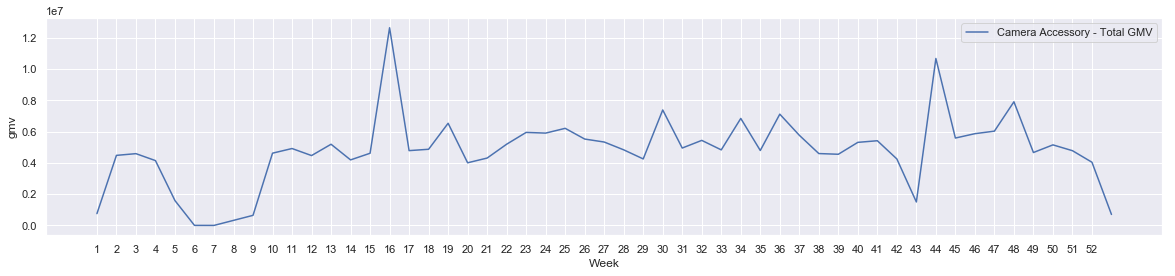

<Figure size 432x288 with 0 Axes>

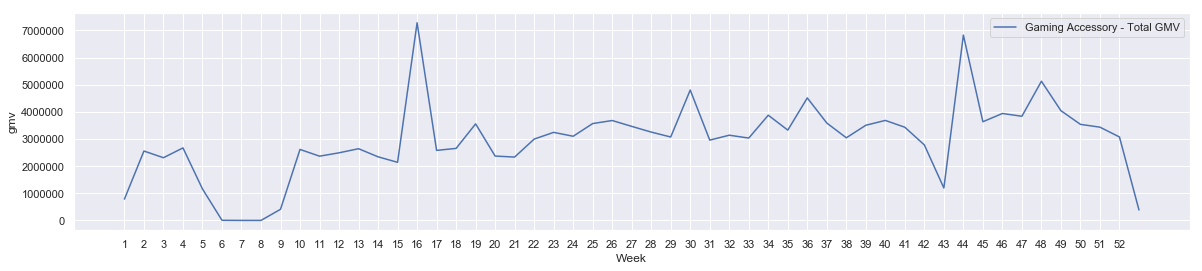

<Figure size 432x288 with 0 Axes>

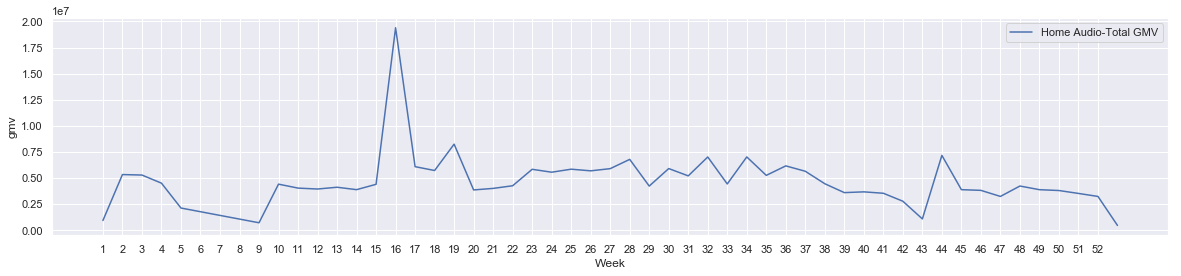

In [76]:
# line plot for the total GMV of sub-categories vs Week number
a=CameraAccessory.pivot_table(values='gmv',index='Week',aggfunc='sum')
b=GamingAccessory.pivot_table(values='gmv',index='Week',aggfunc='sum')
c=HomeAudio.pivot_table(values='gmv',index='Week',aggfunc='sum')

#Subplot 1
plt.figure(1)
plt.figure(figsize=(20,4))
sns.set()
sns.lineplot(y='gmv',x=a.index,data=a, label='Camera Accessory - Total GMV').set_xticks(np.arange(1,53,1))

plt.show()

#Subplot 2

plt.figure(2)
plt.figure(figsize=(20,4))
sns.set()
sns.lineplot(y='gmv',x=b.index,data=b, label='Gaming Accessory - Total GMV').set_xticks(np.arange(1,53,1))

plt.show()

#Subplot 3
plt.figure(3)
plt.figure(figsize=(20,4))
sns.set()
sns.lineplot(y='gmv',x=c.index,data=c, label='Home Audio-Total GMV', ).set_xticks(np.arange(1,53,1))

plt.show()

In [77]:
Eleckart1.head()

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Other,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,19,16,2015.0,(17-15th Oct),16.0,16.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,20,16,2015.0,(17-15th Oct),16.0,16.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,14,16,2015.0,(17-15th Oct),16.0,16.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,0.0,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0


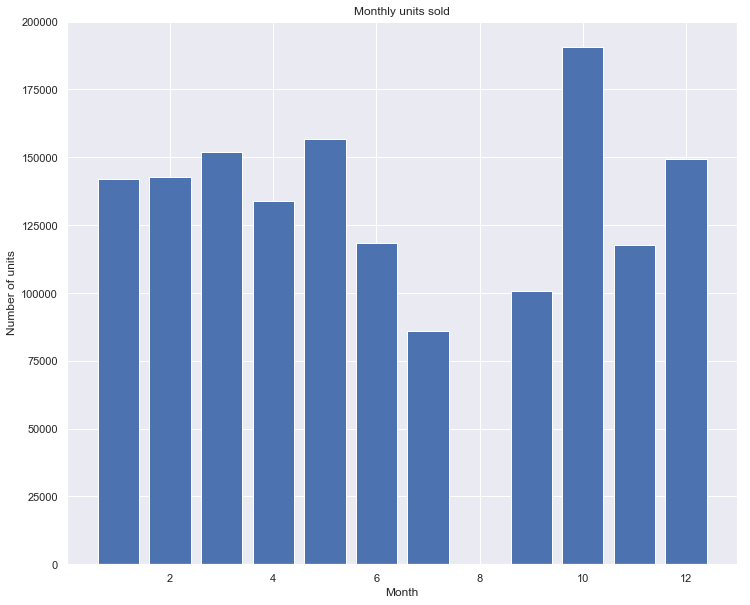

In [78]:
# Monthly units sold
agg=Eleckart1.groupby('Month').units.sum()
plt.figure(figsize=(12,10))
plt.bar(agg.index,agg.values)
plt.xlabel('Month')
plt.ylabel('Number of units')
plt.title('Monthly units sold')
plt.show()

#### October saw the highest number of units sold

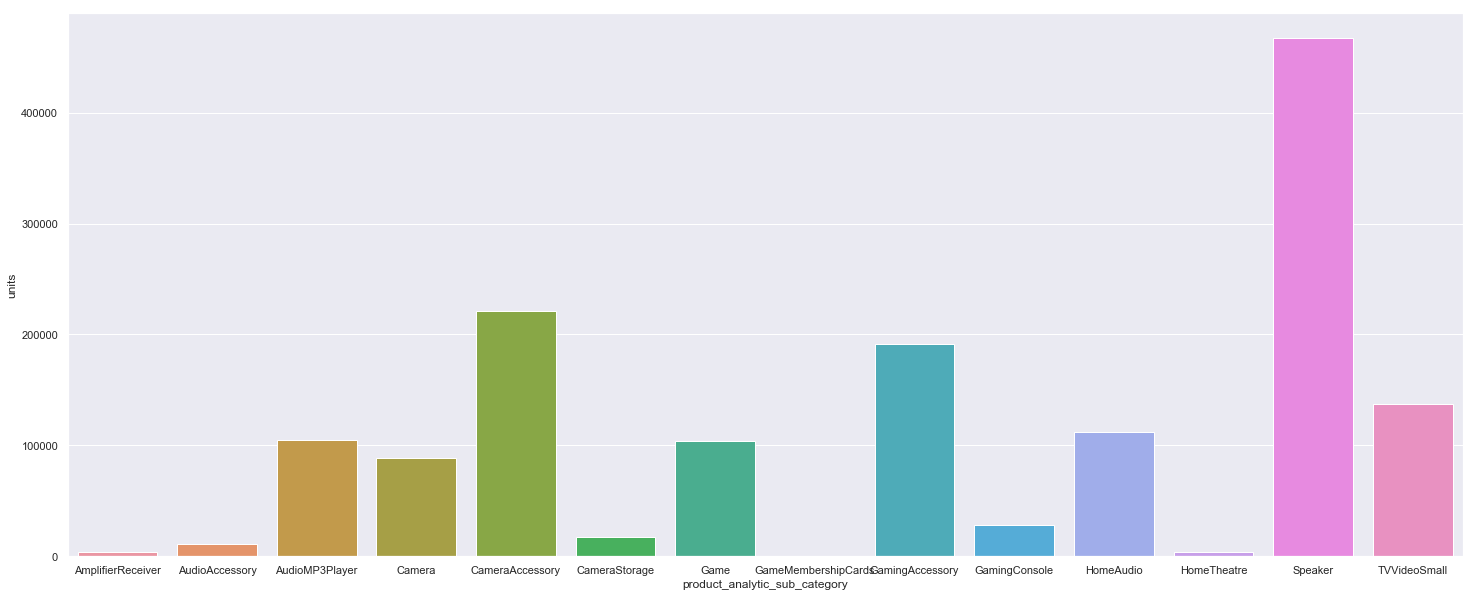

In [79]:

agg = Eleckart1.pivot_table(values='units',index='product_analytic_sub_category',aggfunc='sum')
plt.figure(figsize=(25,10))
sns.barplot(x=agg.index, y='units', data=agg)

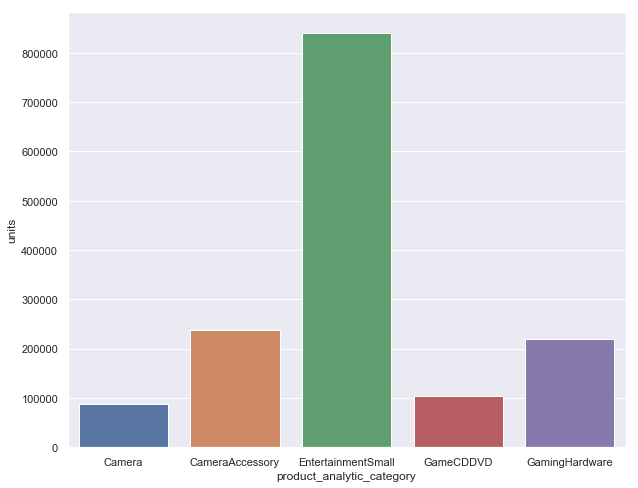

In [80]:
### Aggregated orders by product category
agg = Eleckart1.pivot_table(values='units',index='product_analytic_category',aggfunc='sum')
plt.figure(figsize=(10,8))
sns.barplot(x=agg.index, y='units', data=agg)

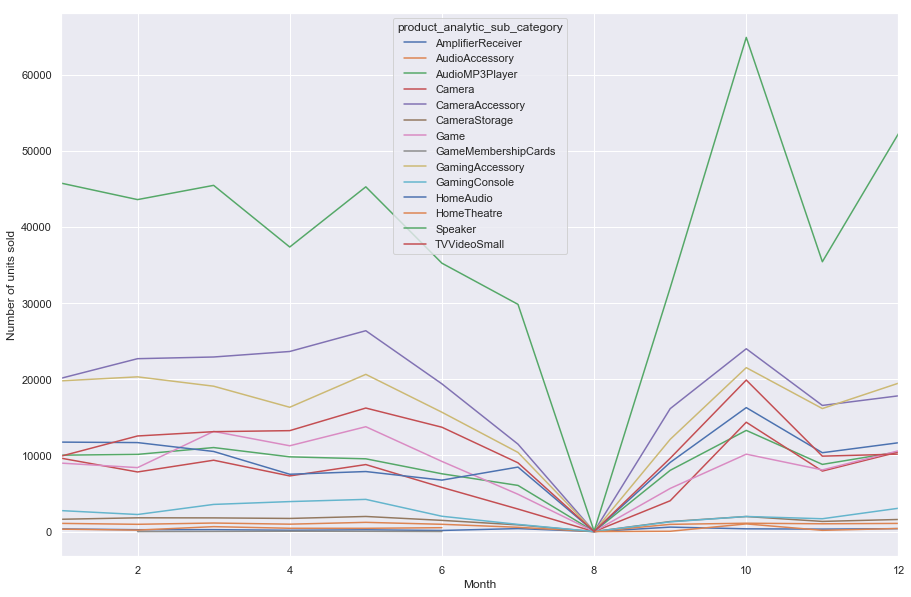

In [81]:
# Aggregated Monthly orders by product sub-category
agg=Eleckart1.pivot_table(values = 'units', 
                      index = 'Month', 
                      columns = 'product_analytic_sub_category', 
                      aggfunc = 'sum')
agg.plot(figsize=(15,10))
plt.ylabel('Number of units sold')
plt.show()

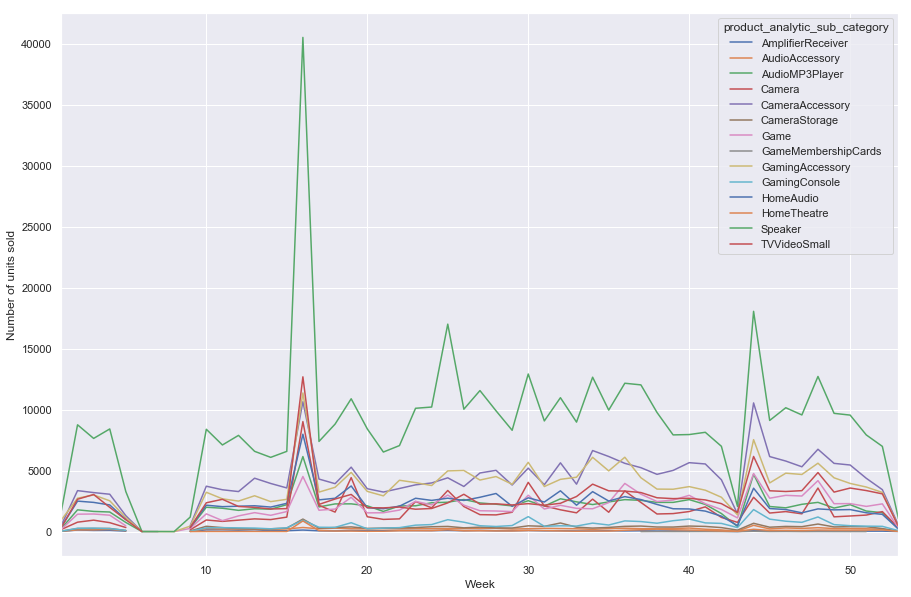

In [82]:
# Aggregated weekly orders by product sub-category
agg=Eleckart1.pivot_table(values = 'units', 
                      index = 'Week', 
                      columns = 'product_analytic_sub_category', 
                      aggfunc = 'sum')
agg.plot(figsize=(15,10))
plt.ylabel('Number of units sold')
plt.show()

Text(0, 0.5, 'Units Sold')

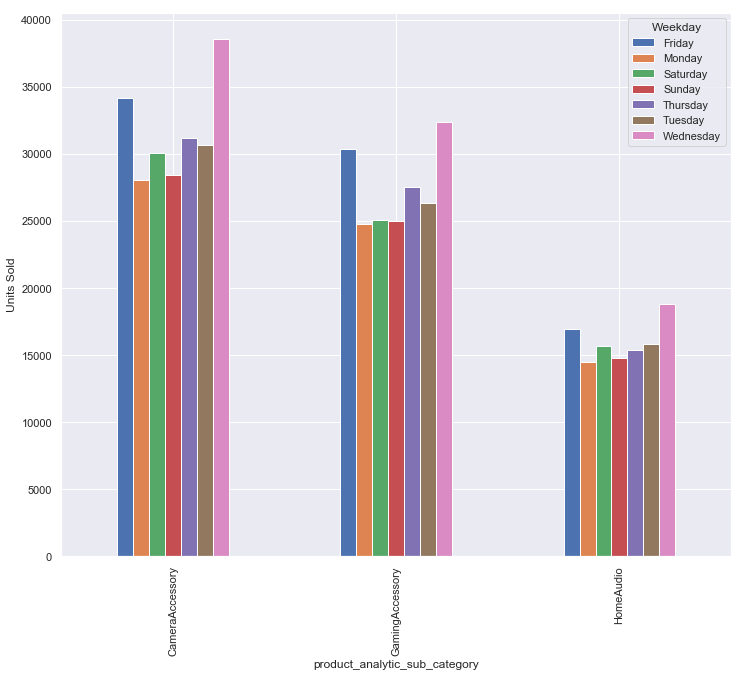

In [83]:
## Aggregated units sold on weekdays/weekends
merge=pd.concat([CameraAccessory,GamingAccessory,HomeAudio],axis=0).reset_index()
merge['order_date']=pd.to_datetime(merge['order_date'], errors='coerce')

import datetime
def dow(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return days[dayNumber]
merge['Weekday'] = merge['order_date'].apply(lambda x : dow(x))

agg=merge.pivot_table(values = 'units', 
                      index = 'product_analytic_sub_category', 
                      columns = 'Weekday', 
                      aggfunc = 'sum')

agg.plot(kind='bar',figsize=(12,10))
plt.ylabel('Units Sold')

Text(0, 0.5, 'GMV')

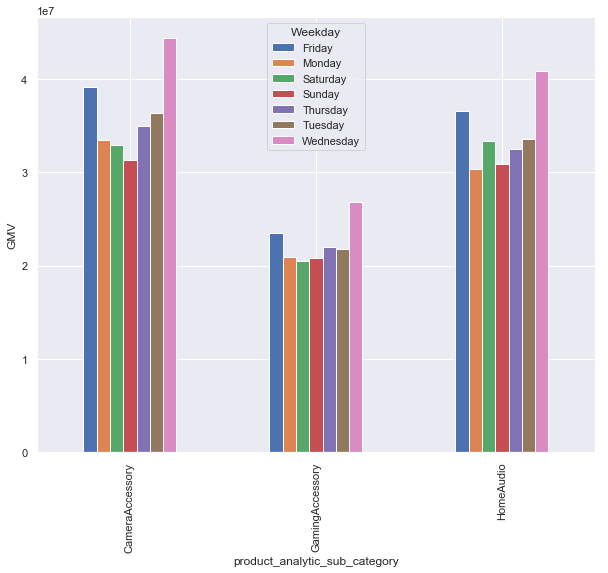

In [84]:
agg=merge.pivot_table(values = 'gmv', 
                      index = 'product_analytic_sub_category', 
                      columns = 'Weekday', 
                      aggfunc = 'sum')
agg.plot(kind='bar',figsize=(10,8))
plt.ylabel('GMV')

Wednesday and Friday show the highest sales both in terms of 'GMV' and 'Units'

Text(0, 0.5, 'Units sold')

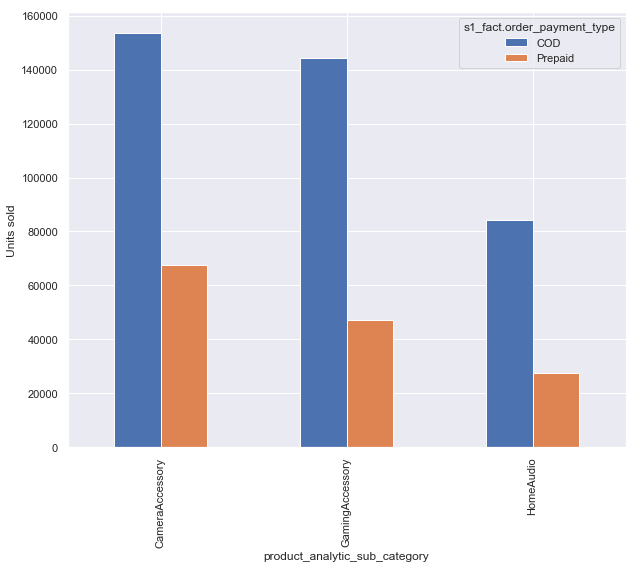

In [85]:
## Aggregated Monthly orders by different payment types
agg=merge.pivot_table(values = 'units', 
                      index = 'product_analytic_sub_category', 
                      columns = 's1_fact.order_payment_type', 
                      aggfunc = 'sum')
agg.plot(kind='bar',figsize=(10,8))
plt.ylabel('Units sold')

Text(0, 0.5, 'Units sold')

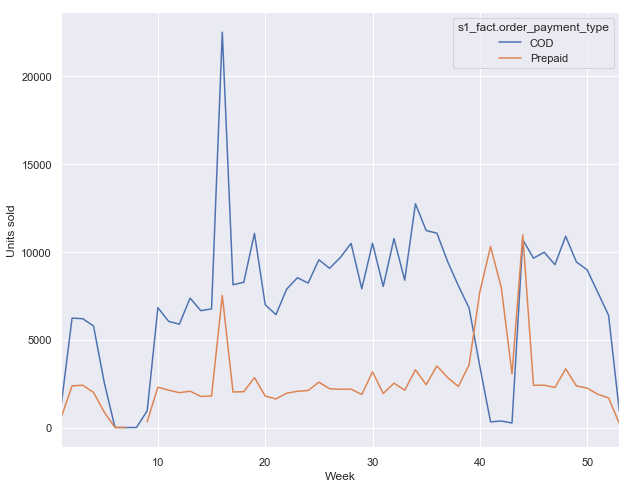

In [86]:
agg=merge.pivot_table(values = 'units', 
                      index = 'Week', 
                      columns = 's1_fact.order_payment_type', 
                      aggfunc = 'sum')
agg.plot(kind='line',figsize=(10,8))
plt.ylabel('Units sold')

### Visualizing media investment data

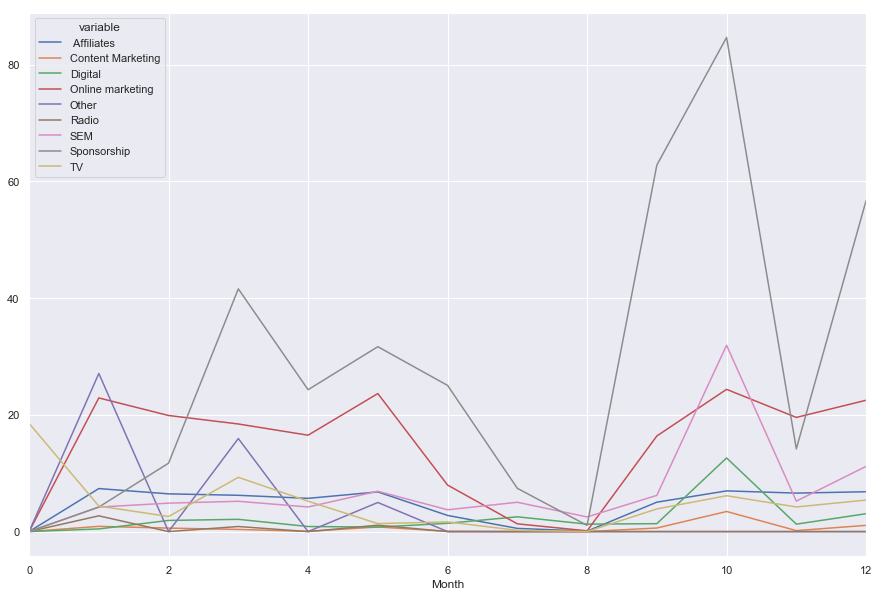

In [87]:
melt_pivot=melt.pivot_table(values = 'value', 
                      index = 'Month', 
                      columns = 'variable', 
                      aggfunc = 'sum')
melt_pivot.plot(figsize=(15,10))

Ad Spends are high throughout the year and high during the promotional events especially befor Dussera,Diwali and New Year.
This Period also sees the maximum sale of units

In [88]:
merge.isnull().sum()

index                              0
fsn_id                             0
order_date                         0
Year_x                             0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
frequency_y                        0
percent                            0
Year_y                             0
Total Investment                   0
TV                                 0
Digital                            0
S

In [89]:
# Removing space from column heading
merge=merge.rename(columns = {' Affiliates':'Affiliates'})

In [90]:
merge.drop('Year_x',axis=1,inplace=True)
# Saving the master dataset for the required sub categories
merge.to_csv('Master_data.csv')

In [91]:
merge.head()

,index,fsn_id,order_date,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week,Weekday
0,0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0,Saturday
1,1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,2015.0-10.0,44.398389,1210.0,19,16,2015.0,(17-15th Oct),16.0,16.0,Monday
2,2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,2015.0-10.0,44.398389,1210.0,20,16,2015.0,(17-15th Oct),16.0,16.0,Tuesday
3,3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,2015.0-10.0,44.398389,1210.0,14,16,2015.0,(17-15th Oct),16.0,16.0,Wednesday
4,4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,2015.0-10.0,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0,Saturday


In [124]:
merge.shape

(511604, 43)